In [148]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [149]:
X_train = pd.read_csv('/Users/harshitagarwal/Desktop/Kaggle Competitions/Predicting Loan Payback/train.csv')
X_test = pd.read_csv('/Users/harshitagarwal/Desktop/Kaggle Competitions/Predicting Loan Payback/test.csv')

In [150]:
X_train.head(5)

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


In [151]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593994 entries, 0 to 593993
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    593994 non-null  int64  
 1   annual_income         593994 non-null  float64
 2   debt_to_income_ratio  593994 non-null  float64
 3   credit_score          593994 non-null  int64  
 4   loan_amount           593994 non-null  float64
 5   interest_rate         593994 non-null  float64
 6   gender                593994 non-null  object 
 7   marital_status        593994 non-null  object 
 8   education_level       593994 non-null  object 
 9   employment_status     593994 non-null  object 
 10  loan_purpose          593994 non-null  object 
 11  grade_subgrade        593994 non-null  object 
 12  loan_paid_back        593994 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 58.9+ MB


In [152]:
#feature engineering for interest rate to reduce noise, easy processing by tree models, to look more like real world interest rates

X_train['new_rate'] = X_train['interest_rate'].round()
X_test['new_rate'] = X_test['interest_rate'].round()

In [153]:
X_train.head(5)

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back,new_rate
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0,14.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0,13.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0,10.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0,16.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0,10.0


In [154]:
X_train.describe()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,loan_paid_back,new_rate
count,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000
mean,296996.500000,48212.202976,0.120696,680.916009,15020.297629,12.356345,0.798820,12.357327
std,171471.442236,26711.942078,0.068573,55.424956,6926.530568,2.008959,0.400883,2.027393
min,0.000000,6002.430000,0.011000,395.000000,500.090000,3.200000,0.000000,3.000000
25%,148498.250000,27934.400000,0.072000,646.000000,10279.620000,10.990000,1.000000,11.000000
50%,296996.500000,46557.680000,0.096000,682.000000,15000.220000,12.370000,1.000000,12.000000
75%,445494.750000,60981.320000,0.156000,719.000000,18858.580000,13.680000,1.000000,14.000000
max,593993.000000,393381.740000,0.627000,849.000000,48959.950000,20.990000,1.000000,21.000000


In [155]:
train_num = X_train.select_dtypes(exclude=object)
label = list(train_num.columns)
print(label)

['id', 'annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount', 'interest_rate', 'loan_paid_back', 'new_rate']


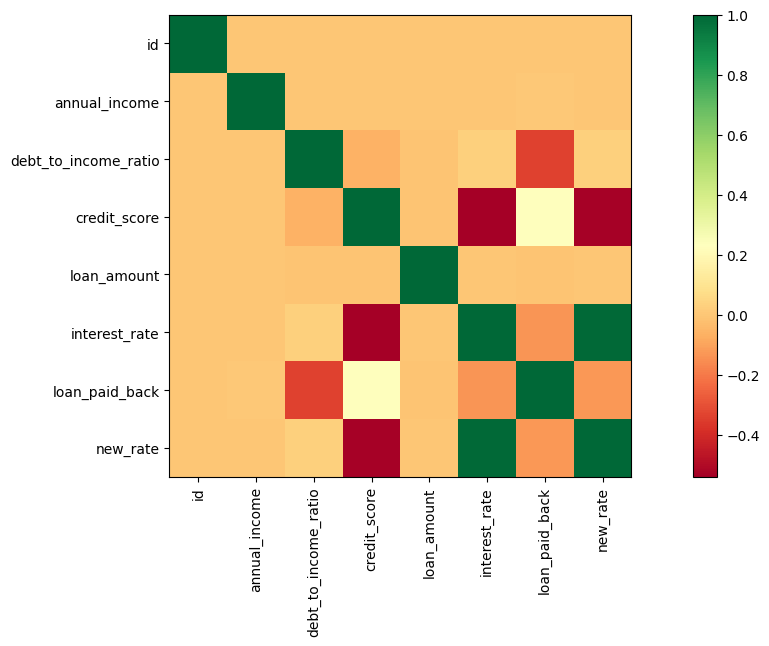

In [156]:
plt.figure(figsize=(16,6))
plt.imshow(train_num.corr(),cmap = 'RdYlGn')
plt.xticks(ticks=range(len(label)), labels=label, rotation=90)
plt.yticks(ticks=range(len(label)), labels=label)
plt.colorbar()
plt.show()

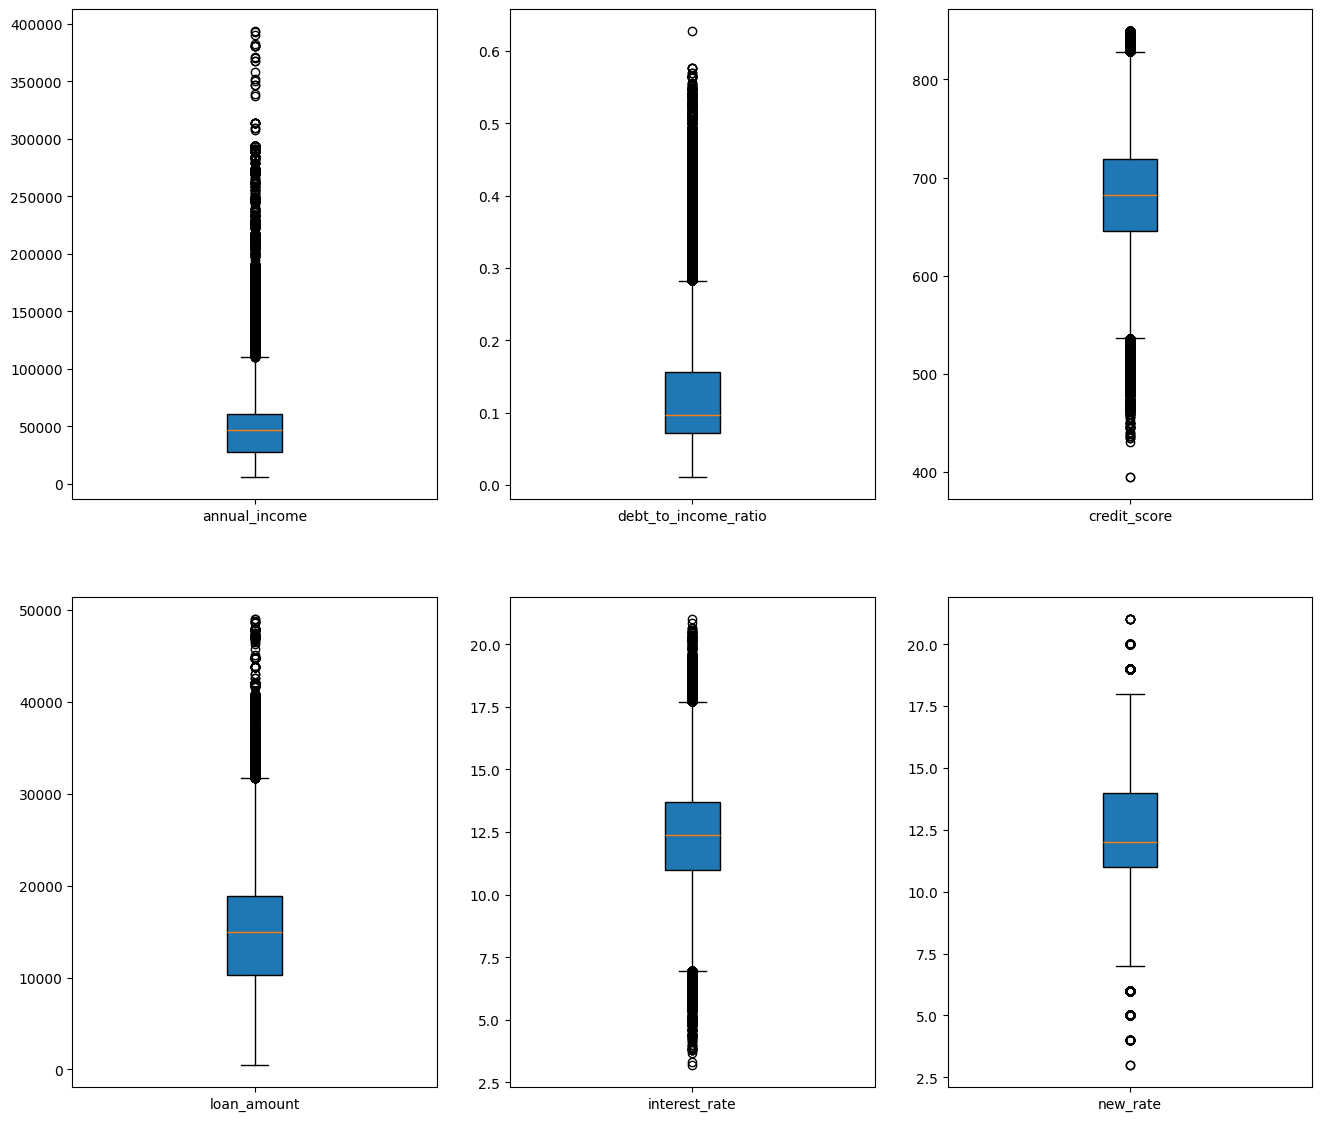

In [157]:
#boxplot for numerical value columns
#outliers are everywhere is most columns


i=1
plt.figure(figsize=(16,14))
for col in train_num.drop(['id', 'loan_paid_back'], axis = 1).columns:
    plt.subplot(2,3,i)
    i+=1
    plt.boxplot(train_num[col], patch_artist = True)
    plt.xticks(ticks=[1], labels = [col])
plt.show()

Plotting over gender


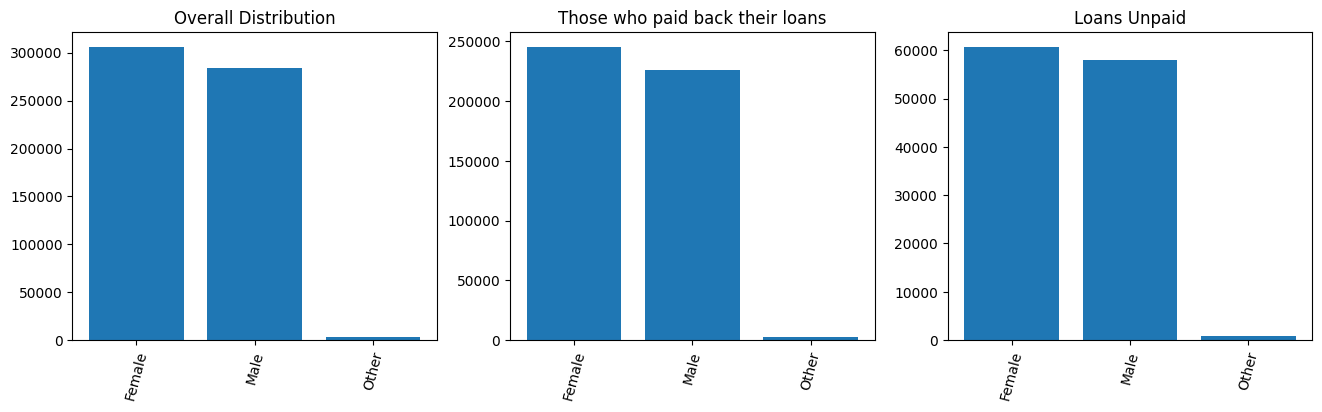

Plotting over marital_status


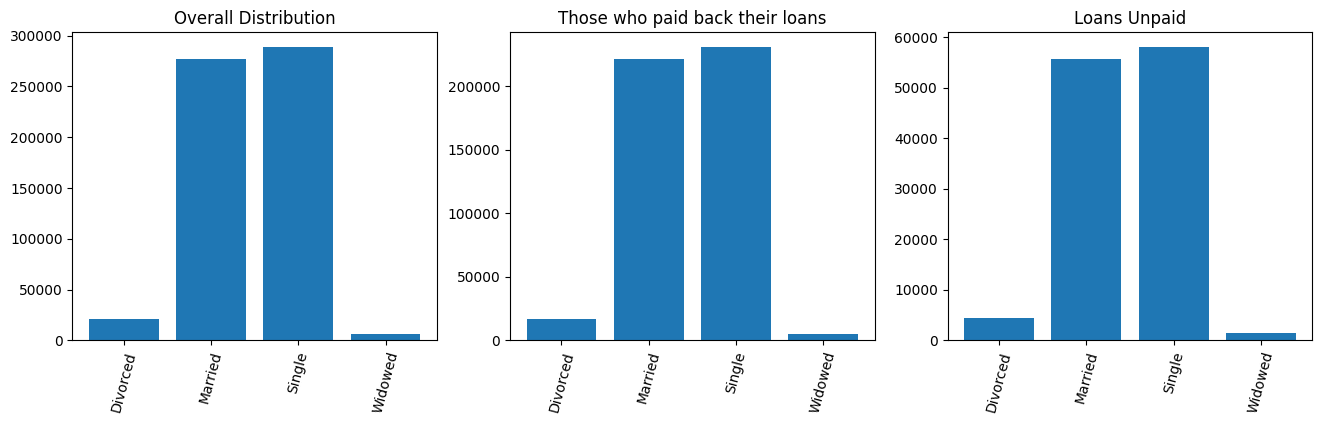

Plotting over education_level


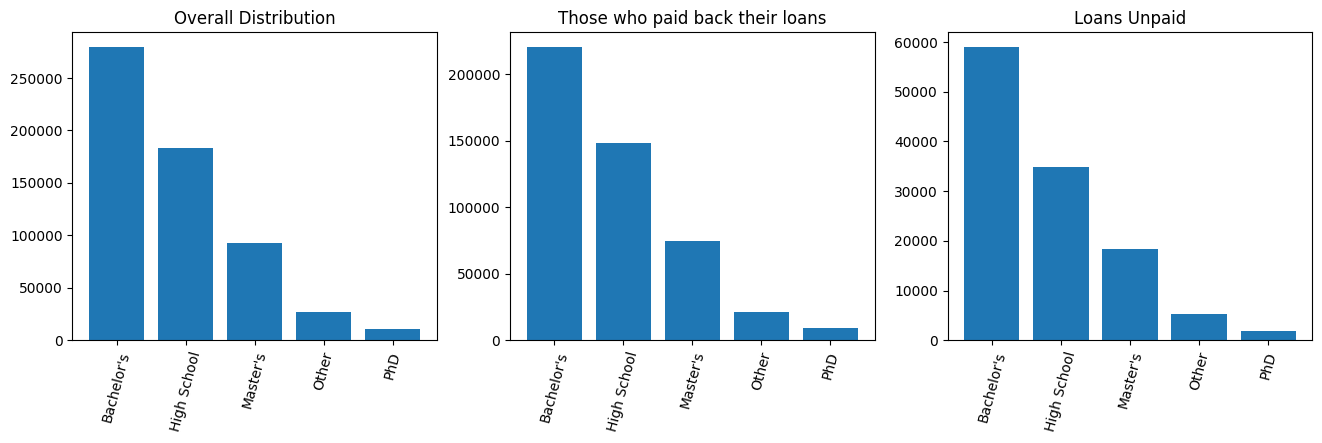

Plotting over loan_purpose


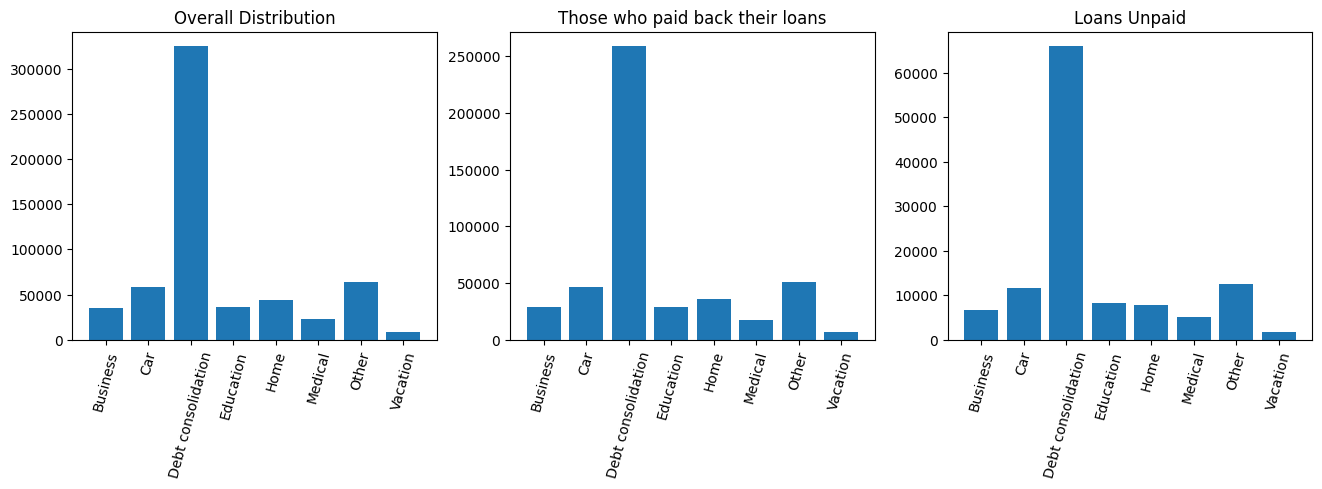

Plotting over grade_subgrade


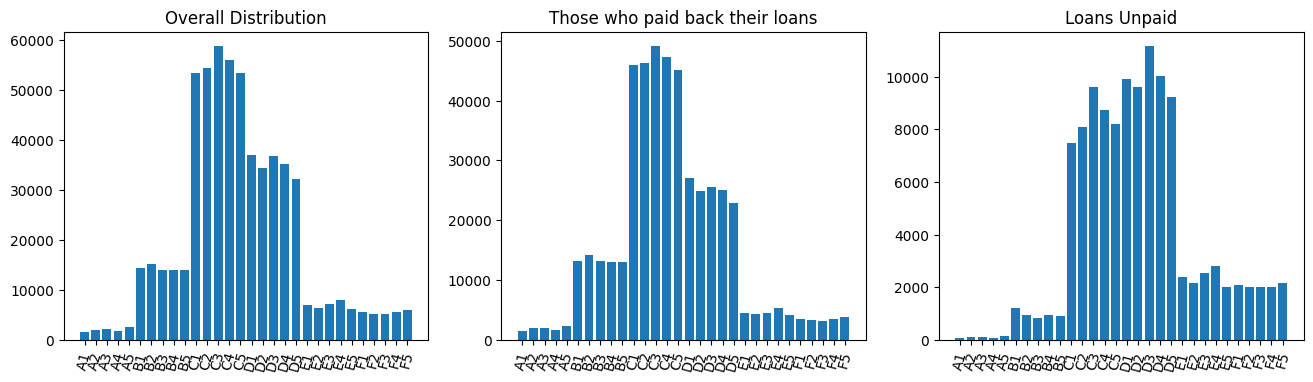

In [158]:
def cat_distribution(col):
    print(f"Plotting over {col}")
    plt.figure(figsize=(16,4))
    plt.subplot(1,3,1)
    
    # groupby(col) - group the rows by the unique values in this column
    #group(col)[col] - from each group select the column i want to operate on
    index = X_train.groupby(col)[col].count().index
    
    #index is the unique column values for example -> in 'Gender' - male, female, other
    plt.bar(index, X_train.groupby(col)[col].count())
    plt.title('Overall Distribution')
    plt.xticks(rotation=75)

    plt.subplot(1,3,2)
    plt.bar(index, X_train[X_train.loan_paid_back==1].groupby(col)[col].count())
    plt.title('Those who paid back their loans')
    plt.xticks(rotation=75)
    
    plt.subplot(1,3,3)
    plt.bar(index, X_train[X_train.loan_paid_back==0].groupby(col)[col].count())
    plt.title('Loans Unpaid')
    plt.xticks(rotation=75)
    plt.show()

cat_distribution('gender')
cat_distribution('marital_status')
cat_distribution('education_level')
cat_distribution('loan_purpose')
cat_distribution('grade_subgrade')

In [159]:
def scatter(col1, col2):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.scatter(X_train[col1][loan_paid], X_train[col2][loan_paid], color = 'b', label = 'loan paid')
    plt.scatter(X_train[col1][loan_unpaid], X_train[col2][loan_unpaid], color = 'r', label = 'loan not paid')
    plt.xlabel(f'{col1}')
    plt.ylabel(f'{col2}')

    plt.title(f'{col1} vs {col2}')
    plt.legend()

    plt.subplot(1,2,2)
    plt.scatter(X_test[col1], X_test[col2], color = 'c', label = col1)
    plt.xlabel(f'{col1}')
    plt.ylabel(f'{col2}')

    plt.title(f"{col1} VS {col2}")
    plt.legend()
    
    plt.show()

loan_paid = X_train['loan_paid_back']==1
loan_unpaid = X_train['loan_paid_back']==0


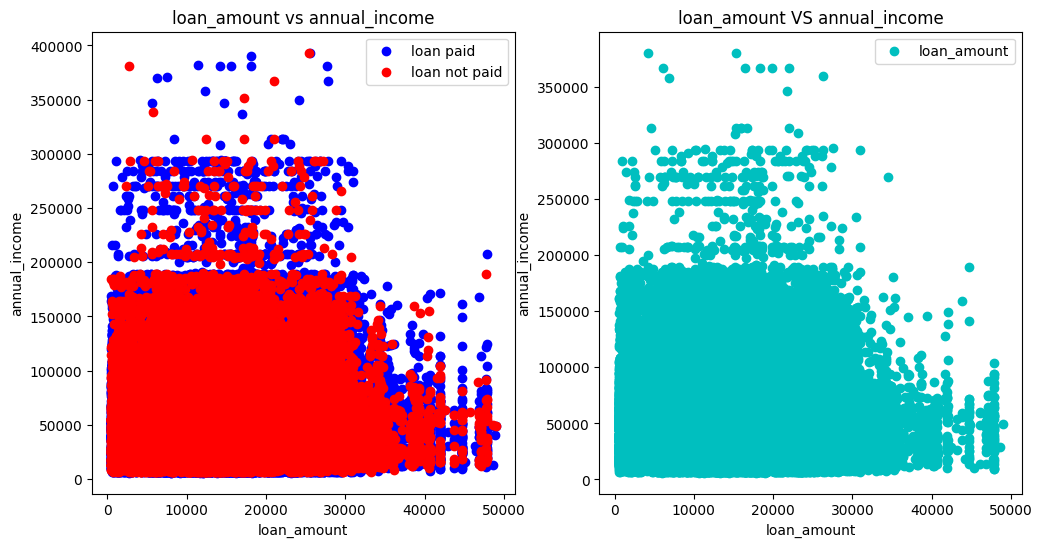

In [160]:
scatter('loan_amount', 'annual_income')

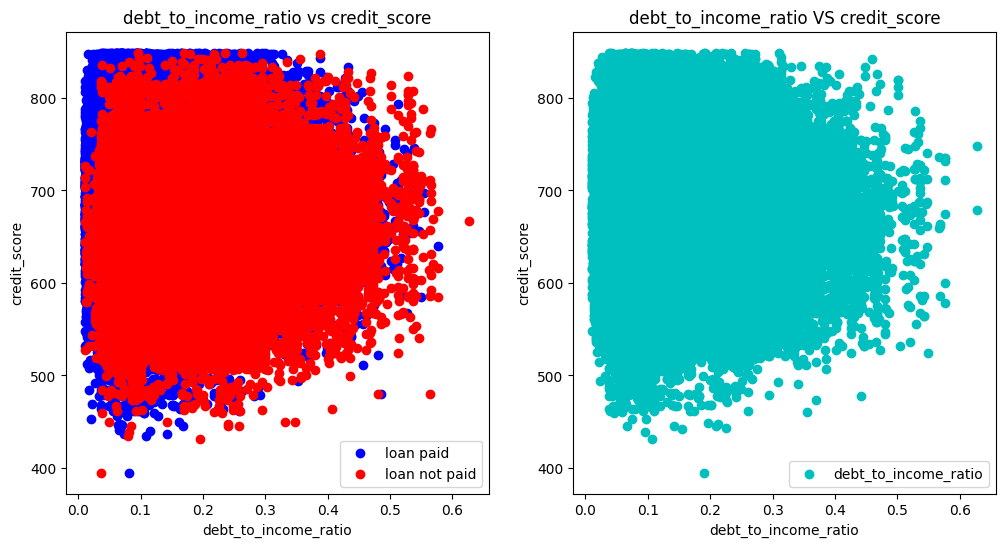

In [161]:
scatter('debt_to_income_ratio', 'credit_score')

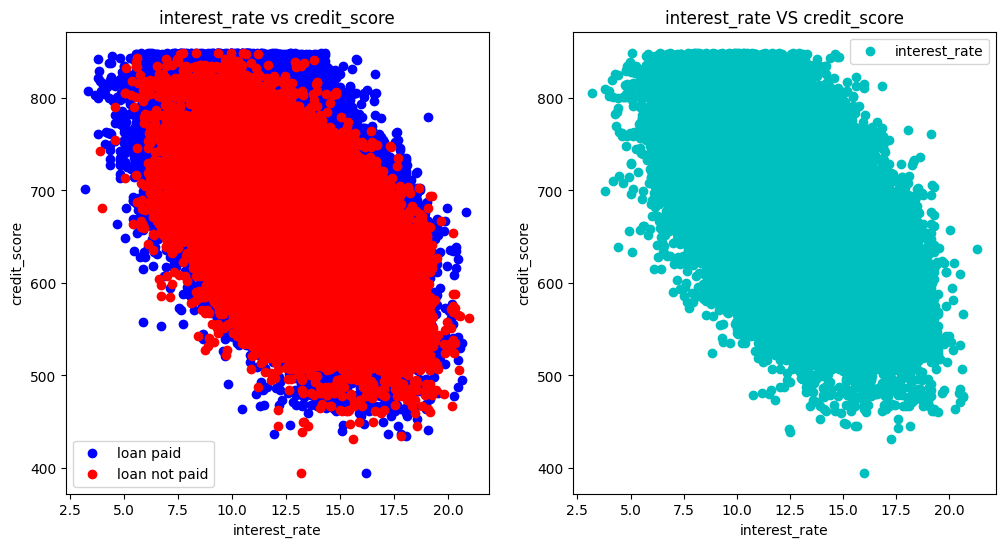

In [162]:
scatter('interest_rate', 'credit_score')

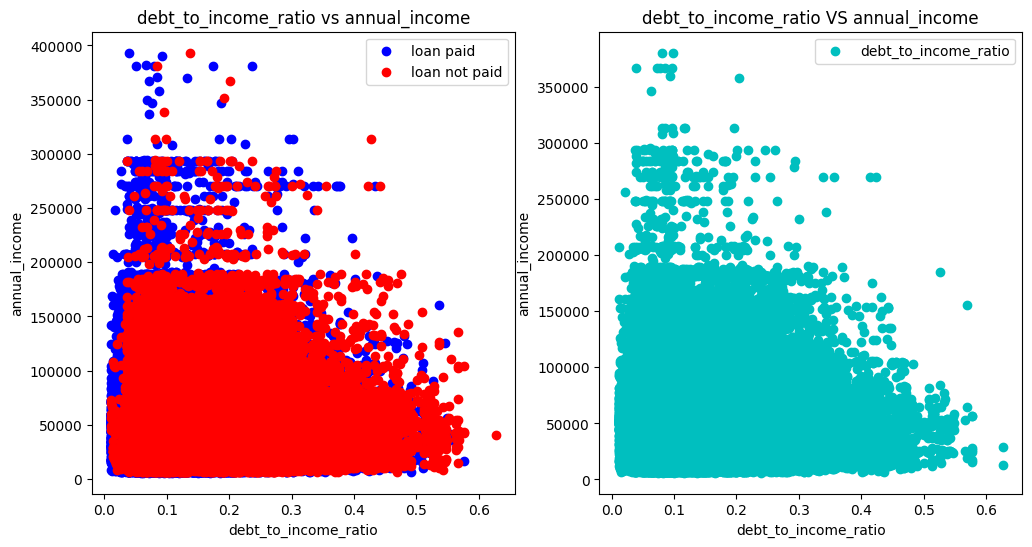

In [163]:
scatter('debt_to_income_ratio', 'annual_income')

# XGBoost

In [164]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from xgboost import XGBClassifier

In [165]:
X_train_cat = X_train.drop(['id', 'annual_income', 'loan_amount', 'loan_paid_back', 'interest_rate', 'debt_to_income_ratio'], axis=1)
X_test_cat = X_test.drop(['id', 'annual_income', 'loan_amount', 'interest_rate', 'debt_to_income_ratio'], axis=1)
X_train_cat.head(5)

,credit_score,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,new_rate
0,736,Female,Single,High School,Self-employed,Other,C3,14.0
1,636,Male,Married,Master's,Employed,Debt consolidation,D3,13.0
2,694,Male,Single,High School,Employed,Debt consolidation,C5,10.0
3,533,Female,Single,High School,Employed,Debt consolidation,F1,16.0
4,665,Male,Married,High School,Employed,Other,D1,10.0


In [166]:
X_test_cat.head(5)

,credit_score,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,new_rate
0,626,Female,Single,High School,Employed,Other,D5,15.0
1,732,Female,Married,Master's,Employed,Other,C1,13.0
2,611,Male,Single,Bachelor's,Employed,Debt consolidation,D1,13.0
3,671,Female,Single,Bachelor's,Employed,Debt consolidation,C3,10.0
4,688,Female,Married,PhD,Employed,Business,C1,13.0


In [167]:
#one hot encoding

oh = OneHotEncoder(handle_unknown = 'ignore', sparse_output = False)
oh_X = pd.DataFrame(oh.fit_transform(X_train_cat))
oh_X.columns = oh_X.columns.astype('category')
oh_X = oh_X.astype('category')

oh_t = pd.DataFrame(oh.transform(X_test_cat))
oh_t.columns = oh_t.columns.astype('category')
oh_t = oh_t.astype('category')

oh_X.head()

,0,1,2,3,4,5,6,7,8,9,...,463,464,465,466,467,468,469,470,471,472
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [168]:
# Extracting Numerical Features
X = X_train.select_dtypes(include = np.number)
test = X_test.select_dtypes(include = np.number)

X.drop('id', axis = 1, inplace = True)
X.head()

# Merging
X = pd.concat([X, oh_X], axis = 1)
X_test = pd.concat([test, oh_t], axis = 1)

In [169]:
y = X.pop('loan_paid_back')
testID = X_test.pop('id')

In [170]:
model = XGBClassifier(n_estimators = 1000, 
                      device = 'cuda', learning_rate = 0.1,
                      enable_categorical = True,
                      random_state=42)

In [171]:
cross_val_score(model, X, y, cv = 5, scoring = 'roc_auc').mean()

/Users/harshitagarwal/Desktop/Kaggle Competitions/denv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [20:28:32] WARNING: /Users/runner/work/xgboost/xgboost/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)
/Users/harshitagarwal/Desktop/Kaggle Competitions/denv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [20:29:07] WARNING: /Users/runner/work/xgboost/xgboost/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)
/Users/harshitagarwal/Desktop/Kaggle Competitions/denv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [20:29:43] WARNING: /Users/runner/work/xgboost/xgboost/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)
/Users/harshitagarwal/Desktop/Kaggle Competitions/denv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [20:30:20] WARNING: /Users/runner/work/xgboost/xgboost/src/context.cc:196

np.float64(0.9205766585383339)

In [172]:
model.fit(X, y)

/Users/harshitagarwal/Desktop/Kaggle Competitions/denv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [20:32:35] WARNING: /Users/runner/work/xgboost/xgboost/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cuda', early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [173]:
final = model.predict_proba(X_test)[:,1]

final = pd.DataFrame({'id': testID, 'loan_paid_back' : final})

final.head()

,id,loan_paid_back
0,593994,0.949363
1,593995,0.977018
2,593996,0.431781
3,593997,0.907148
4,593998,0.958097


In [174]:
final.to_csv('submission.csv', index = False)